## Importing Libraries

In [1]:
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
import keras

## Importing Data

In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

## Categories and the Classes in data

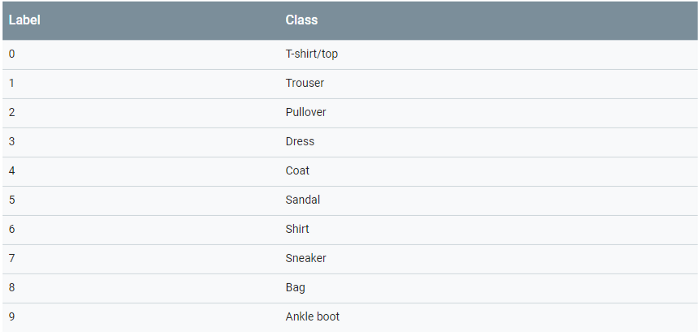

In [48]:
from IPython.display import Image

Image(filename = "MNIST_Fashion.png")

## Checking the Dimesnions of the dataset

In [3]:
print('Train: X=%s, y=%s' % (train_X.shape, train_Y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_Y.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
test_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Checking Pixels of the First Image 

In [5]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Plotting the First Few Images

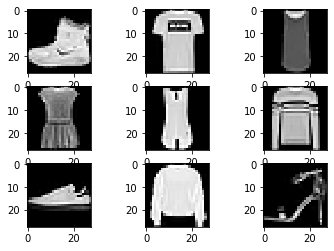

In [6]:
for i in range(9):
    
    # defining subplot
    pyplot.subplot(331 + i)
    
    # plotting raw pixel data
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    
    
# show the figure
pyplot.show()

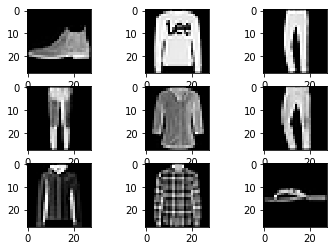

In [7]:
for i in range(9):
    
    # defining subplot
    pyplot.subplot(331 + i)
    
    # plotting raw pixel data
    pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
    
    
# show the figure
pyplot.show()

## Data Preprocessing

### 1. Reshaping the Data

In [8]:
## When using a convolutional layer as the first layer to our model, 
## we need to reshape our data to (n_images, x_shape, y_shape, channels). 

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

## Negative one is the same as specifying the total number of images in the training set.

In [9]:
train_X.shape

(60000, 28, 28, 1)

### 2. Scaling

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255
test_X = test_X / 255

### 3. One- Hot Encoding the Target Variable

In [11]:
train_Y_one_hot = to_categorical(train_Y)

test_Y_one_hot = to_categorical(test_Y)

In [12]:
test_Y_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Model Building

In [16]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

### Fitting the Model

In [18]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 51s 54ms/step - loss: 0.4699 - accuracy: 0.8303
Epoch 2/10
938/938 [==============================] - 51s 54ms/step - loss: 0.3194 - accuracy: 0.8841
Epoch 3/10
938/938 [==============================] - 50s 54ms/step - loss: 0.2776 - accuracy: 0.8998
Epoch 4/10
938/938 [==============================] - 50s 54ms/step - loss: 0.2542 - accuracy: 0.9079
Epoch 5/10
938/938 [==============================] - 52s 55ms/step - loss: 0.2328 - accuracy: 0.9154
Epoch 6/10
938/938 [==============================] - 51s 55ms/step - loss: 0.2175 - accuracy: 0.9198
Epoch 7/10
938/938 [==============================] - 51s 54ms/step - loss: 0.2016 - accuracy: 0.9265
Epoch 8/10
938/938 [==============================] - 51s 54ms/step - loss: 0.1870 - accuracy: 0.9329
Epoch 9/10
938/938 [==============================] - 50s 54ms/step - loss: 0.1774 - accuracy: 0.9351
Epoch 10/10
938/938 [==============================] - 51s 54ms/step - loss: 0.165

In [26]:
loss, acc = model.evaluate(test_X, test_Y_one_hot)

print('Train loss is:', loss)
print('Train accuracy is:', acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2823 - accuracy: 0.9033
Train loss is: 0.28229838609695435
Train accuracy is: 0.9032999873161316


## Predictions

In [31]:
pred_prob = model.predict(test_X)

print(np.argmax(np.round(predictions[0])))

9


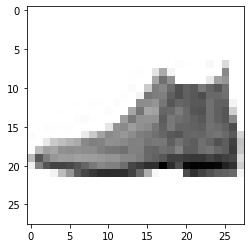

In [43]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

### 9 belongs to the class ankle boot and our model has predicted it accurately

In [32]:
predictions = np.argmax(pred_prob, axis=-1)

predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

## Model Evaluation

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
print("The Classification Report is: ",'\n', classification_report(predictions, test_Y))

print("Confusion Matrix:", '\n',confusion_matrix(predictions, test_Y))

The Classification Report is:  
               precision    recall  f1-score   support

           0       0.92      0.78      0.84      1182
           1       0.98      0.99      0.99       997
           2       0.89      0.82      0.85      1082
           3       0.90      0.93      0.91       963
           4       0.86      0.84      0.85      1015
           5       0.99      0.96      0.97      1024
           6       0.61      0.80      0.69       769
           7       0.96      0.96      0.96      1001
           8       0.97      0.99      0.98       979
           9       0.96      0.98      0.97       988

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

Confusion Matrix: 
 [[921   2  24  34   4   0 186   0  10   1]
 [  1 984   0   9   0   0   3   0   0   0]
 [ 15   1 889  14  81   0  76   0   6   0]
 [ 12   9   6 895  22   0  18   0   1   0]
 [  2   2  31  2

In [42]:
print('The Train Accuracy is: %.3f' % (acc * 100.0), '\n', 
      "The Test Accuracy: %.3f" % accuracy_score(predictions, test_Y), '\n',
     "The fit is good as there is neither underfitting nor overfitting")

The Train Accuracy is: 90.330 
 The Test Accuracy: 0.903 
 The fit is good as there is neither underfitting nor overfitting
